In [ ]:
# imports

# pandas for data frame loading and manipulation
import pandas as pd
# to download the dataset directly
import kagglehub
# numpy for numerical computations
import numpy as np
# imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# for encoding
from sklearn.preprocessing import LabelEncoder
# for chi sqaure test
from scipy.stats import chi2_contingency



**0. Load Dataset**

In [ ]:
# load dataset from kraggle into colab during runtime
dataset_path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")
# print where files were saved
print("path to dataset files:", dataset_path)

# read raw data csv into a dataframe
df_raw = pd.read_csv(dataset_path + "/survey.csv")


100%|██████████| 48.8k/48.8k [00:00<00:00, 44.8MB/s]

Extracting files...
path to dataset files: /root/.cache/kagglehub/datasets/osmi/mental-health-in-tech-survey/versions/3


**1. Inspect Dataset**

In [ ]:
# check shape of the dataset i.e., rows and cols
print("shape of the dataset:", df_raw.shape)

shape of the dataset: (1259, 27)


In [ ]:
# check the first few rows
df_raw.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# view the col names
df_raw.columns.to_list()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [ ]:
# get some info about the cols like data types, null counts and memory usage
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# to see summary of statistics and sense of distribution for numeric cols
df_raw.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


clearly max and min values show there are some outliers that need to be discarded

In [ ]:
# count missing values in each col
df_raw.isnull().sum().sort_values(ascending=False)

,0
comments,1095
state,515
work_interfere,264
self_employed,18
Gender,0
Timestamp,0
Age,0
family_history,0
treatment,0
no_employees,0


In [ ]:
# % of missing values
(df_raw.isnull().sum()/len(df_raw) * 100).sort_values(ascending=False)

,0
comments,86.973789
state,40.905481
work_interfere,20.969023
self_employed,1.429706
Gender,0.000000
Timestamp,0.000000
Age,0.000000
family_history,0.000000
treatment,0.000000
no_employees,0.000000


**2. Data Cleaning and Processing:**

**Drop Irrelevant and Unstable Cols**

In [ ]:
# drop irrelevant and unstable cols

# col timestamp has no use here
# col comments has about 87% null values

df_raw.drop(columns=["Timestamp", "comments"], inplace=True)

**Handle Missing Values**

In [ ]:
# we have missing values in state, self_employed and work_interfere cols

# check values in self_employed col
df_raw['self_employed'].value_counts()

# result is Yes, No

# replace missing values in self_employed col
df_raw['self_employed'].fillna("Unknown", inplace=True)


/tmp/ipython-input-3523184629.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['self_employed'].fillna("Unknown", inplace=True)


In [ ]:
# we have missing values in state, self_employed and work_interfere cols

# check values in work_interfere col
df_raw['work_interfere'].value_counts()

# result is Sometimes, Never, Rarely, Often

# replace missing values in work_interfere col
df_raw['work_interfere'].fillna("Unknown", inplace=True)

/tmp/ipython-input-645504971.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['work_interfere'].fillna("Unknown", inplace=True)


In [ ]:
# we have missing values in state, self_employed and work_interfere cols

# check values in state col
df_raw['state'].value_counts()

# result is states from US only. other countries is null

# replace missing values in state col
df_raw['state'].fillna("Unknown", inplace=True)

/tmp/ipython-input-3652370607.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['state'].fillna("Unknown", inplace=True)


In [ ]:
# verify if missing values are handled
df_raw.isnull().sum().sort_values(ascending=False)

,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0


**Data Standardisation**


In [ ]:
# check values in gender col
df_raw['Gender'].value_counts()

,count
Gender,
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


In [ ]:
# consolidate and map the genders into 3 categories: male, female and others

# define mapping func
def clean_gender(gender):
  gender = gender.strip().lower()

  if gender in ['male', 'm', 'make', 'cis male', 'man', 'male-ish', 'male (cis)', 'mal', 'something kinda male?', 'maile', 'guy (-ish) ^_^', 'male leaning androgynous', 'msle', 'malr', 'cis man']:
    return 'Male'
  elif gender in ['female', 'f', 'woman', 'cis female', 'femake', 'cis-female/femme', 'female (cis)', 'femail']:
    return 'Female'
  else:
    return 'Others'

# apply mapping func
df_raw['Gender'] = df_raw['Gender'].apply(clean_gender)
# check value counts again
df_raw['Gender'].value_counts()


,count
Gender,
Male,993
Female,247
Others,19


In [ ]:
# trim leading and trainling whistepaces in Country col
df_raw['Country'] = df_raw['Country'].str.strip()

# display unique country names sorted
sorted_countries = sorted(df_raw['Country'].unique())
for counntry in sorted_countries:
  print(counntry)

Australia
Austria
Bahamas, The
Belgium
Bosnia and Herzegovina
Brazil
Bulgaria
Canada
China
Colombia
Costa Rica
Croatia
Czech Republic
Denmark
Finland
France
Georgia
Germany
Greece
Hungary
India
Ireland
Israel
Italy
Japan
Latvia
Mexico
Moldova
Netherlands
New Zealand
Nigeria
Norway
Philippines
Poland
Portugal
Romania
Russia
Singapore
Slovenia
South Africa
Spain
Sweden
Switzerland
Thailand
United Kingdom
United States
Uruguay
Zimbabwe


In [ ]:
# map Bahamas, The to The Bahamas for geomapping later
country_mapping = {'Bahamas The': 'The Bahamas'}
df_raw['Country'] = df_raw['Country'].replace(country_mapping)

In [ ]:
# check work_interfere col
df_raw['work_interfere'].value_counts(dropna=False)

,count
work_interfere,
Sometimes,465
Unknown,264
Never,213
Rarely,173
Often,144


In [ ]:
# check self_employed col
df_raw['self_employed'].value_counts(dropna=False)

,count
self_employed,
No,1095
Yes,146
Unknown,18


In [ ]:
# check family_history col
df_raw['family_history'].value_counts(dropna=False)

,count
family_history,
No,767
Yes,492


In [ ]:
# check treatment col
df_raw['treatment'].value_counts(dropna=False)

,count
treatment,
Yes,637
No,622


In [ ]:
# check no_employees col
df_raw['no_employees'].value_counts(dropna=False)

,count
no_employees,
6-25,290
26-100,289
More than 1000,282
100-500,176
1-5,162
500-1000,60


In [ ]:
# check remote_work col
df_raw['remote_work'].value_counts(dropna=False)

,count
remote_work,
No,883
Yes,376


In [ ]:
# check tech_company col
df_raw['tech_company'].value_counts(dropna=False)

,count
tech_company,
Yes,1031
No,228


In [ ]:
# check benefits col
df_raw['benefits'].value_counts(dropna=False)

,count
benefits,
Yes,477
Don't know,408
No,374


In [ ]:
# standardise dont know to unknown in benefits col
df_raw['benefits'] = df_raw['benefits'].replace('Don\'t know', 'Unknown')

In [ ]:
# verify benefits col
df_raw['benefits'].value_counts(dropna=False)

,count
benefits,
Yes,477
Unknown,408
No,374


In [ ]:
# check care_options col
df_raw['care_options'].value_counts(dropna=False)

,count
care_options,
No,501
Yes,444
Not sure,314


In [ ]:
# standardise Not sure to unknown in care_options col
df_raw['care_options'] = df_raw['care_options'].replace('Not sure', 'Unknown')

In [ ]:
# verify care_options col
df_raw['care_options'].value_counts(dropna=False)

,count
care_options,
No,501
Yes,444
Unknown,314


In [ ]:
# check wellness_program col
df_raw['wellness_program'].value_counts(dropna=False)

,count
wellness_program,
No,842
Yes,229
Don't know,188


In [ ]:
# standardise Dont know to unknown in wellness_program col
df_raw['wellness_program'] = df_raw['wellness_program'].replace('Don\'t know', 'Unknown')

# verify wellness_program col
df_raw['wellness_program'].value_counts(dropna=False)

,count
wellness_program,
No,842
Yes,229
Unknown,188


In [ ]:
# check seek_help col
df_raw['seek_help'].value_counts(dropna=False)

,count
seek_help,
No,646
Don't know,363
Yes,250


In [ ]:
# standardise Dont know to unknown in seek_help col
df_raw['seek_help'] = df_raw['seek_help'].replace('Don\'t know', 'Unknown')

# verify seek_help col
df_raw['seek_help'].value_counts(dropna=False)

,count
seek_help,
No,646
Unknown,363
Yes,250


In [ ]:
# check anonymity col
df_raw['anonymity'].value_counts(dropna=False)

,count
anonymity,
Don't know,819
Yes,375
No,65


In [ ]:
# standardise Dont know to unknown in anonymity col
df_raw['anonymity'] = df_raw['anonymity'].replace('Don\'t know', 'Unknown')

# verify anonymity col
df_raw['anonymity'].value_counts(dropna=False)

,count
anonymity,
Unknown,819
Yes,375
No,65


In [ ]:
# check leave col
df_raw['leave'].value_counts(dropna=False)

,count
leave,
Don't know,563
Somewhat easy,266
Very easy,206
Somewhat difficult,126
Very difficult,98


In [ ]:
# map values in leave col to ints
df_raw['leave'] = df_raw['leave'].str.strip()

leave_map = {
    "Very easy": 0,
    "Somewhat easy": 1,
    "Somewhat difficult": 2,
    "Very difficult": 3,
    "Don't know": 4
}

df_raw['leave'] = df_raw['leave'].map(leave_map)

# verify leave col
df_raw['leave'].value_counts(dropna=False)

,count
leave,
4,563
1,266
0,206
2,126
3,98


In [ ]:
# check mental_health_consequence col
df_raw['mental_health_consequence'].value_counts(dropna=False)

,count
mental_health_consequence,
No,490
Maybe,477
Yes,292


In [ ]:
# standardise Maybe to Unsure in mental_health_consequence col
df_raw['mental_health_consequence'] = df_raw['mental_health_consequence'].replace('Maybe', 'Unsure')

# verify mental_health_consequence col
df_raw['mental_health_consequence'].value_counts(dropna=False)

,count
mental_health_consequence,
No,490
Unsure,477
Yes,292


In [ ]:
# check phys_health_consequence col
df_raw['phys_health_consequence'].value_counts(dropna=False)

,count
phys_health_consequence,
No,925
Maybe,273
Yes,61


In [ ]:
# standardise Maybe to Unsure in phys_health_consequence col
df_raw['phys_health_consequence'] = df_raw['phys_health_consequence'].replace('Maybe', 'Unsure')

# verify phys_health_consequence col
df_raw['phys_health_consequence'].value_counts(dropna=False)

,count
phys_health_consequence,
No,925
Unsure,273
Yes,61


In [ ]:
# check coworkers col
df_raw['coworkers'].value_counts(dropna=False)

,count
coworkers,
Some of them,774
No,260
Yes,225


In [ ]:
# standardise Some of them to Unsure in coworkers col
df_raw['coworkers'] = df_raw['coworkers'].str.strip().replace('Some of them', 'Unsure')

# verify coworkers col
df_raw['coworkers'].value_counts(dropna=False)

,count
coworkers,
Unsure,774
No,260
Yes,225


In [ ]:
# check supervisor col
df_raw['supervisor'].value_counts(dropna=False)

,count
supervisor,
Yes,516
No,393
Some of them,350


In [ ]:
# standardise Some of them to Unsure in supervisor col
df_raw['supervisor'] = df_raw['supervisor'].str.strip().replace('Some of them', 'Unsure')

# verify supervisor col
df_raw['supervisor'].value_counts(dropna=False)

,count
supervisor,
Yes,516
No,393
Unsure,350


In [ ]:
# check mental_health_interview col
df_raw['mental_health_interview'].value_counts(dropna=False)

,count
mental_health_interview,
No,1008
Maybe,207
Yes,44


In [ ]:
# standardise Maybe to Unsure in mental_health_interview col
df_raw['mental_health_interview'] = df_raw['mental_health_interview'].str.strip().replace('Maybe', 'Unsure')

# verify mental_health_interview col
df_raw['mental_health_interview'].value_counts(dropna=False)

,count
mental_health_interview,
No,1008
Unsure,207
Yes,44


In [ ]:
# check phys_health_interview col
df_raw['phys_health_interview'].value_counts(dropna=False)

,count
phys_health_interview,
Maybe,557
No,500
Yes,202


In [ ]:
# standardise Maybe to Unsure in phys_health_interview col
df_raw['phys_health_interview'] = df_raw['phys_health_interview'].str.strip().replace('Maybe', 'Unsure')

# verify phys_health_interview col
df_raw['phys_health_interview'].value_counts(dropna=False)

,count
phys_health_interview,
Unsure,557
No,500
Yes,202


In [ ]:
# check mental_vs_physical col
df_raw['mental_vs_physical'].value_counts(dropna=False)

,count
mental_vs_physical,
Don't know,576
Yes,343
No,340


In [ ]:
# standardise Don't know to Unknown in mental_vs_physical col
df_raw['mental_vs_physical'] = df_raw['mental_vs_physical'].str.strip().replace('Don\'t know', 'Unknown')

# verify mental_vs_physical col
df_raw['mental_vs_physical'].value_counts(dropna=False)

,count
mental_vs_physical,
Unknown,576
Yes,343
No,340


In [ ]:
# check obs_consequence col
df_raw['obs_consequence'].value_counts(dropna=False)

,count
obs_consequence,
No,1075
Yes,184


In [ ]:
# check age col
df_raw['Age'].value_counts(dropna=False)

,count
Age,
29,85
32,82
26,75
27,71
33,70
28,68
31,67
34,65
30,63


In [ ]:
# summary stats for Age col
df_raw['Age'].describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
# show smallest 10 values in Age
df_raw['Age'].sort_values().unique()[:10]

array([-1726,   -29,    -1,     5,     8,    11,    18,    19,    20,
          21])

In [ ]:
# show largest 10 values in Age
df_raw['Age'].sort_values(ascending=False).unique()[:10]

array([99999999999,         329,          72,          65,          62,
                61,          60,          58,          57,          56])

In [ ]:
# remove outliers in Age col

# ensure all values are numeric
df_raw['Age'] = pd.to_numeric(df_raw['Age'], errors='coerce')

# set invalid ages to NaN. less than 18 and greater than 100
df_raw.loc[df_raw['Age'] < 18, 'Age'] = np.nan
df_raw.loc[df_raw['Age'] > 100, 'Age'] = np.nan

# create age groups
age_bins = [17, 24, 34, 44, 54, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']

# create new column for age groups
df_raw['age_group'] = pd.cut(df_raw['Age'], bins=age_bins, labels=age_labels)

# verify age_group col
df_raw['age_group'].value_counts(dropna=False)

,count
age_group,
25-34,707
35-44,320
18-24,156
45-54,51
55+,17
NaN,8


In [ ]:
# verify age col
df_raw['Age'].describe()

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [ ]:
sorted(df_raw['state'].dropna().unique())

['AL',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'FL',
 'GA',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'Unknown',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [ ]:
# upper case and strip all entries in state just to be safe
df_raw['state'] = df_raw['state'].str.strip().str.upper()

In [ ]:
# remove leading and trailing whitespaces from all string cols
df_raw = df_raw.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

**Renaming Cols**

In [ ]:
df_raw.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_group'],
      dtype='object')

In [ ]:
df_raw.rename(columns={
    'no_employees': 'num_employees',
    'mental_health_consequence': 'mental_health_conseq',
    'phys_health_consequence': 'physical_health_conseq',
    'mental_health_interview': 'mental_health_interview',
    'phys_health_interview': 'physical_health_interview',
    'self_employed': 'is_self_employed',
    'tech_company': 'is_tech_company',
    'obs_consequence': 'observed_consequence',
    'Age': 'age',
    'Gender': 'gender',
    'Country': 'country'
}, inplace=True)


In [ ]:
df_raw.columns

Index(['age', 'gender', 'country', 'state', 'is_self_employed',
       'family_history', 'treatment', 'work_interfere', 'num_employees',
       'remote_work', 'is_tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_conseq', 'physical_health_conseq', 'coworkers',
       'supervisor', 'mental_health_interview', 'physical_health_interview',
       'mental_vs_physical', 'observed_consequence', 'age_group'],
      dtype='object')

**Convert Data Types**

In [ ]:
# check col info again
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        1251 non-null   float64 
 1   gender                     1259 non-null   object  
 2   country                    1259 non-null   object  
 3   state                      1259 non-null   object  
 4   is_self_employed           1259 non-null   object  
 5   family_history             1259 non-null   object  
 6   treatment                  1259 non-null   object  
 7   work_interfere             1259 non-null   object  
 8   num_employees              1259 non-null   object  
 9   remote_work                1259 non-null   object  
 10  is_tech_company            1259 non-null   object  
 11  benefits                   1259 non-null   object  
 12  care_options               1259 non-null   object  
 13  wellness_program           1259 n

In [ ]:
# convert age to integer
df_raw['age'] = df_raw['age'].astype('Int64')

**Create New Cols**

In [ ]:
# add a new col that shows continent for each country for later visualisations

!pip install pycountry-convert
import pycountry_convert as pc


def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

df_raw['continent'] = df_raw['country'].apply(country_to_continent)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.6/250.6 kB 11.2 MB/s eta 0:00:00


In [ ]:
# check continent col
df_raw['continent'].value_counts(dropna=False)

,count
continent,
North America,827
Europe,361
Oceania,29
Asia,24
South America,9
Africa,8
Unknown,1


In [ ]:
# remove whitespaces again just to be on the safer side
df_raw = df_raw.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

**Save a Clean Copy**

In [ ]:
df_cleaned = df_raw.copy()

**3. EDA**

**3.1 Univariate Analysis (Distribution and Counts)**

**Histogram of Age Distribution:** shows overall age spread, skewness, age outliers and answers questions such as are most respondent young adults?

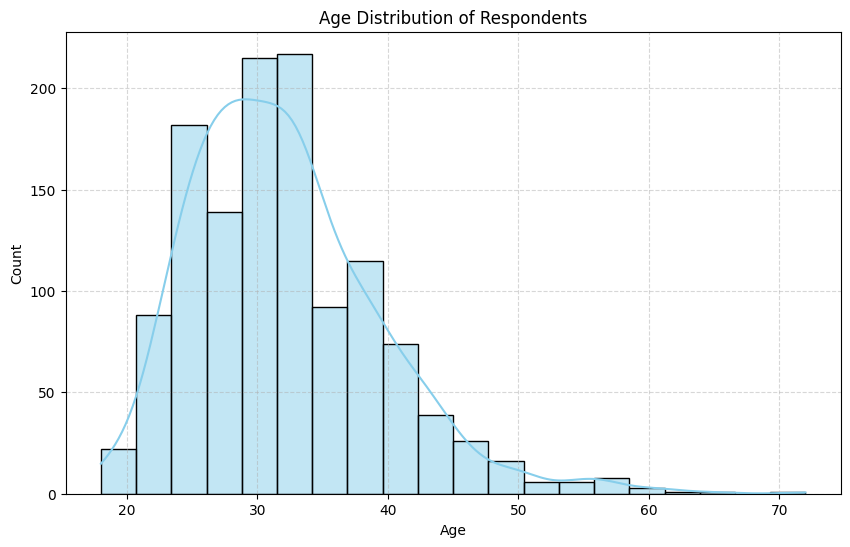

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Boxplot to Detect Outliers:** outliers however have already been managed during the data processing

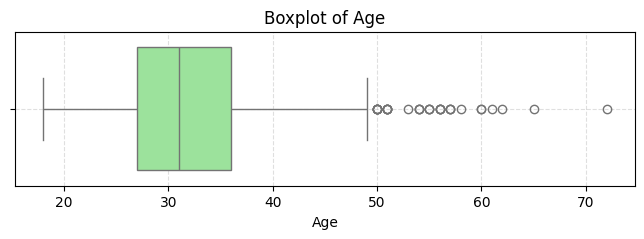

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_cleaned['age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

**Countplot of Gender Distribution**

/tmp/ipython-input-1343520330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='gender', order=df_cleaned['gender'].value_counts().index, palette='viridis')


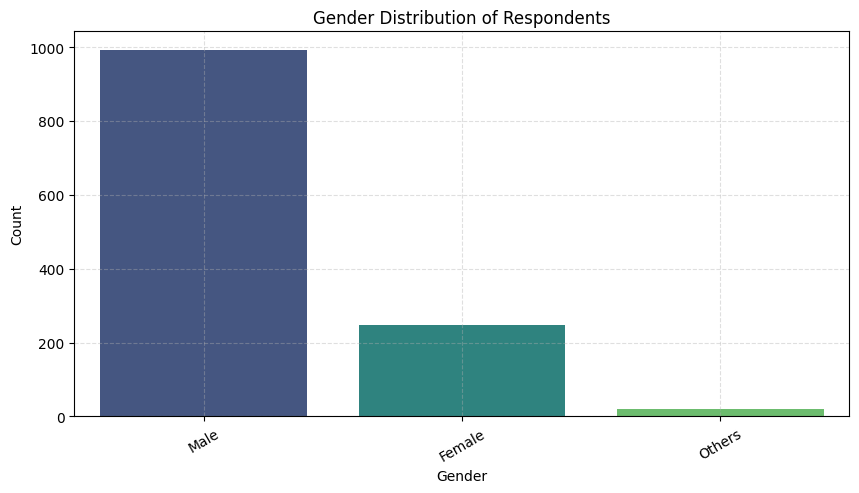

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='gender', order=df_cleaned['gender'].value_counts().index, palette='viridis')
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

**Country Distribution:** Top 10 countries with respondents

/tmp/ipython-input-1916159845.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='country_grouped', order=df_cleaned['country_grouped'].value_counts().index, palette='mako')


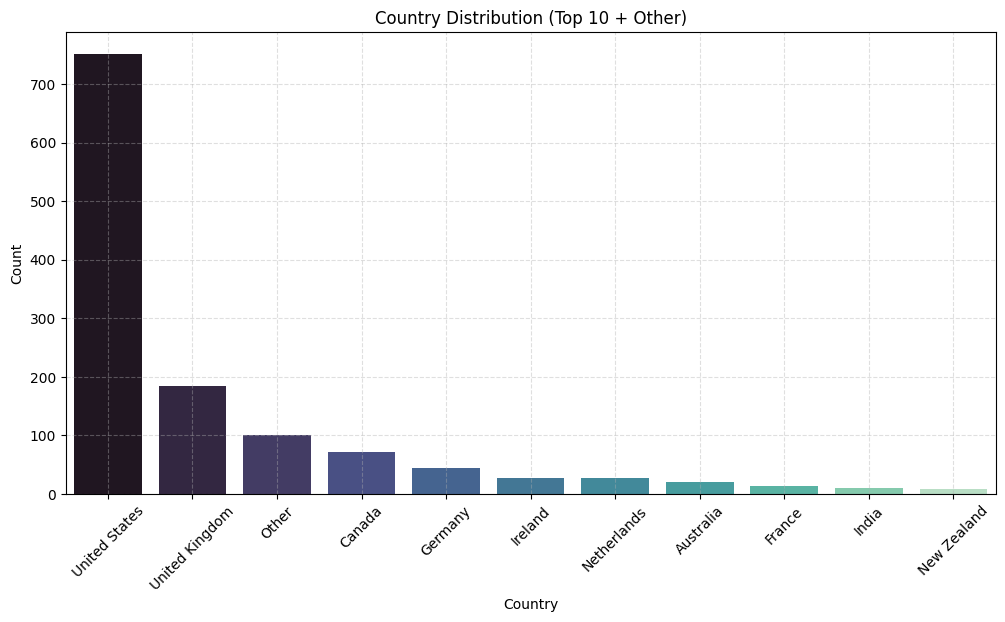

In [ ]:
# get top 10 countries
top_countries = df_cleaned['country'].value_counts().nlargest(10)
df_cleaned['country_grouped'] = df_cleaned['country'].apply(lambda x: x if x in top_countries.index else 'Other')

# now visualise
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='country_grouped', order=df_cleaned['country_grouped'].value_counts().index, palette='mako')
plt.title('Country Distribution (Top 10 + Other)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


**US States Distribution:** Top 10 states with respondents

/tmp/ipython-input-1265016884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_us, x='state', order=df_us['state'].value_counts().head(10).index, palette='cubehelix')


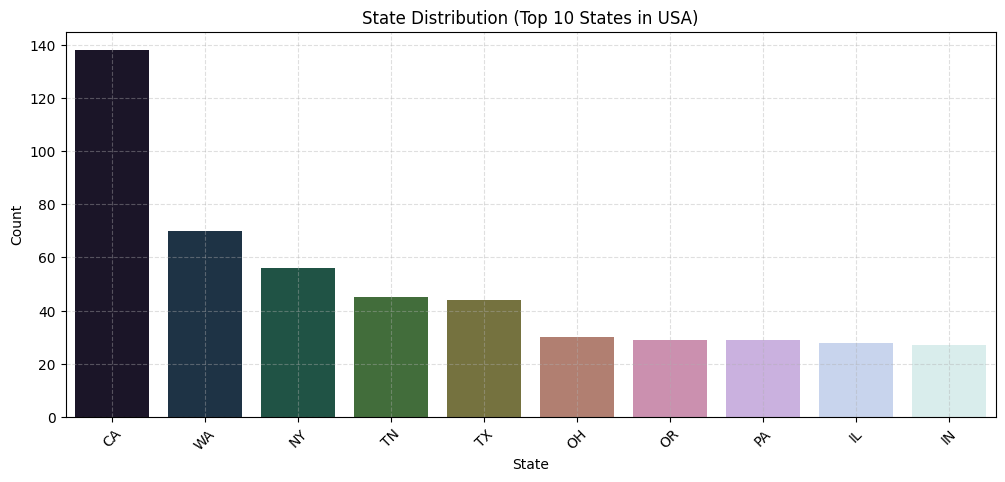

In [ ]:
# filter only USA respondents
df_us = df_cleaned[df_cleaned['country'] == 'United States']

plt.figure(figsize=(12, 5))
sns.countplot(data=df_us, x='state', order=df_us['state'].value_counts().head(10).index, palette='cubehelix')
plt.title('State Distribution (Top 10 States in USA)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


**Binary Categorical Variables: Remote Work, Self-Employed, Tech Company**

/tmp/ipython-input-230588232.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')
/tmp/ipython-input-230588232.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')
/tmp/ipython-input-230588232.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


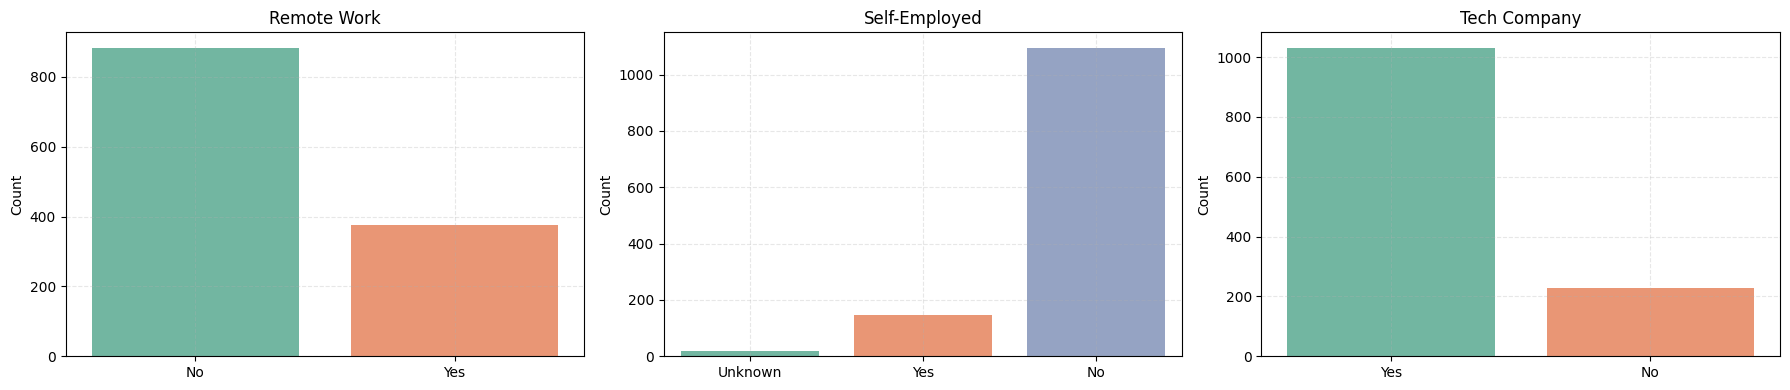

In [ ]:
binary_cols = ['remote_work', 'is_self_employed', 'is_tech_company']
titles = ['Remote Work', 'Self-Employed', 'Tech Company']

plt.figure(figsize=(18, 4))
for i, col in enumerate(binary_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df_cleaned, x=col, palette='Set2')
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


**Categorical Variables**

/tmp/ipython-input-2386950475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel', order=df_cleaned[col].value_counts().index)
/tmp/ipython-input-2386950475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel', order=df_cleaned[col].value_counts().index)
/tmp/ipython-input-2386950475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='pastel', order=df_cleaned[col].value_counts().index)
/tmp/ipython-input-2386950475.py:7: F

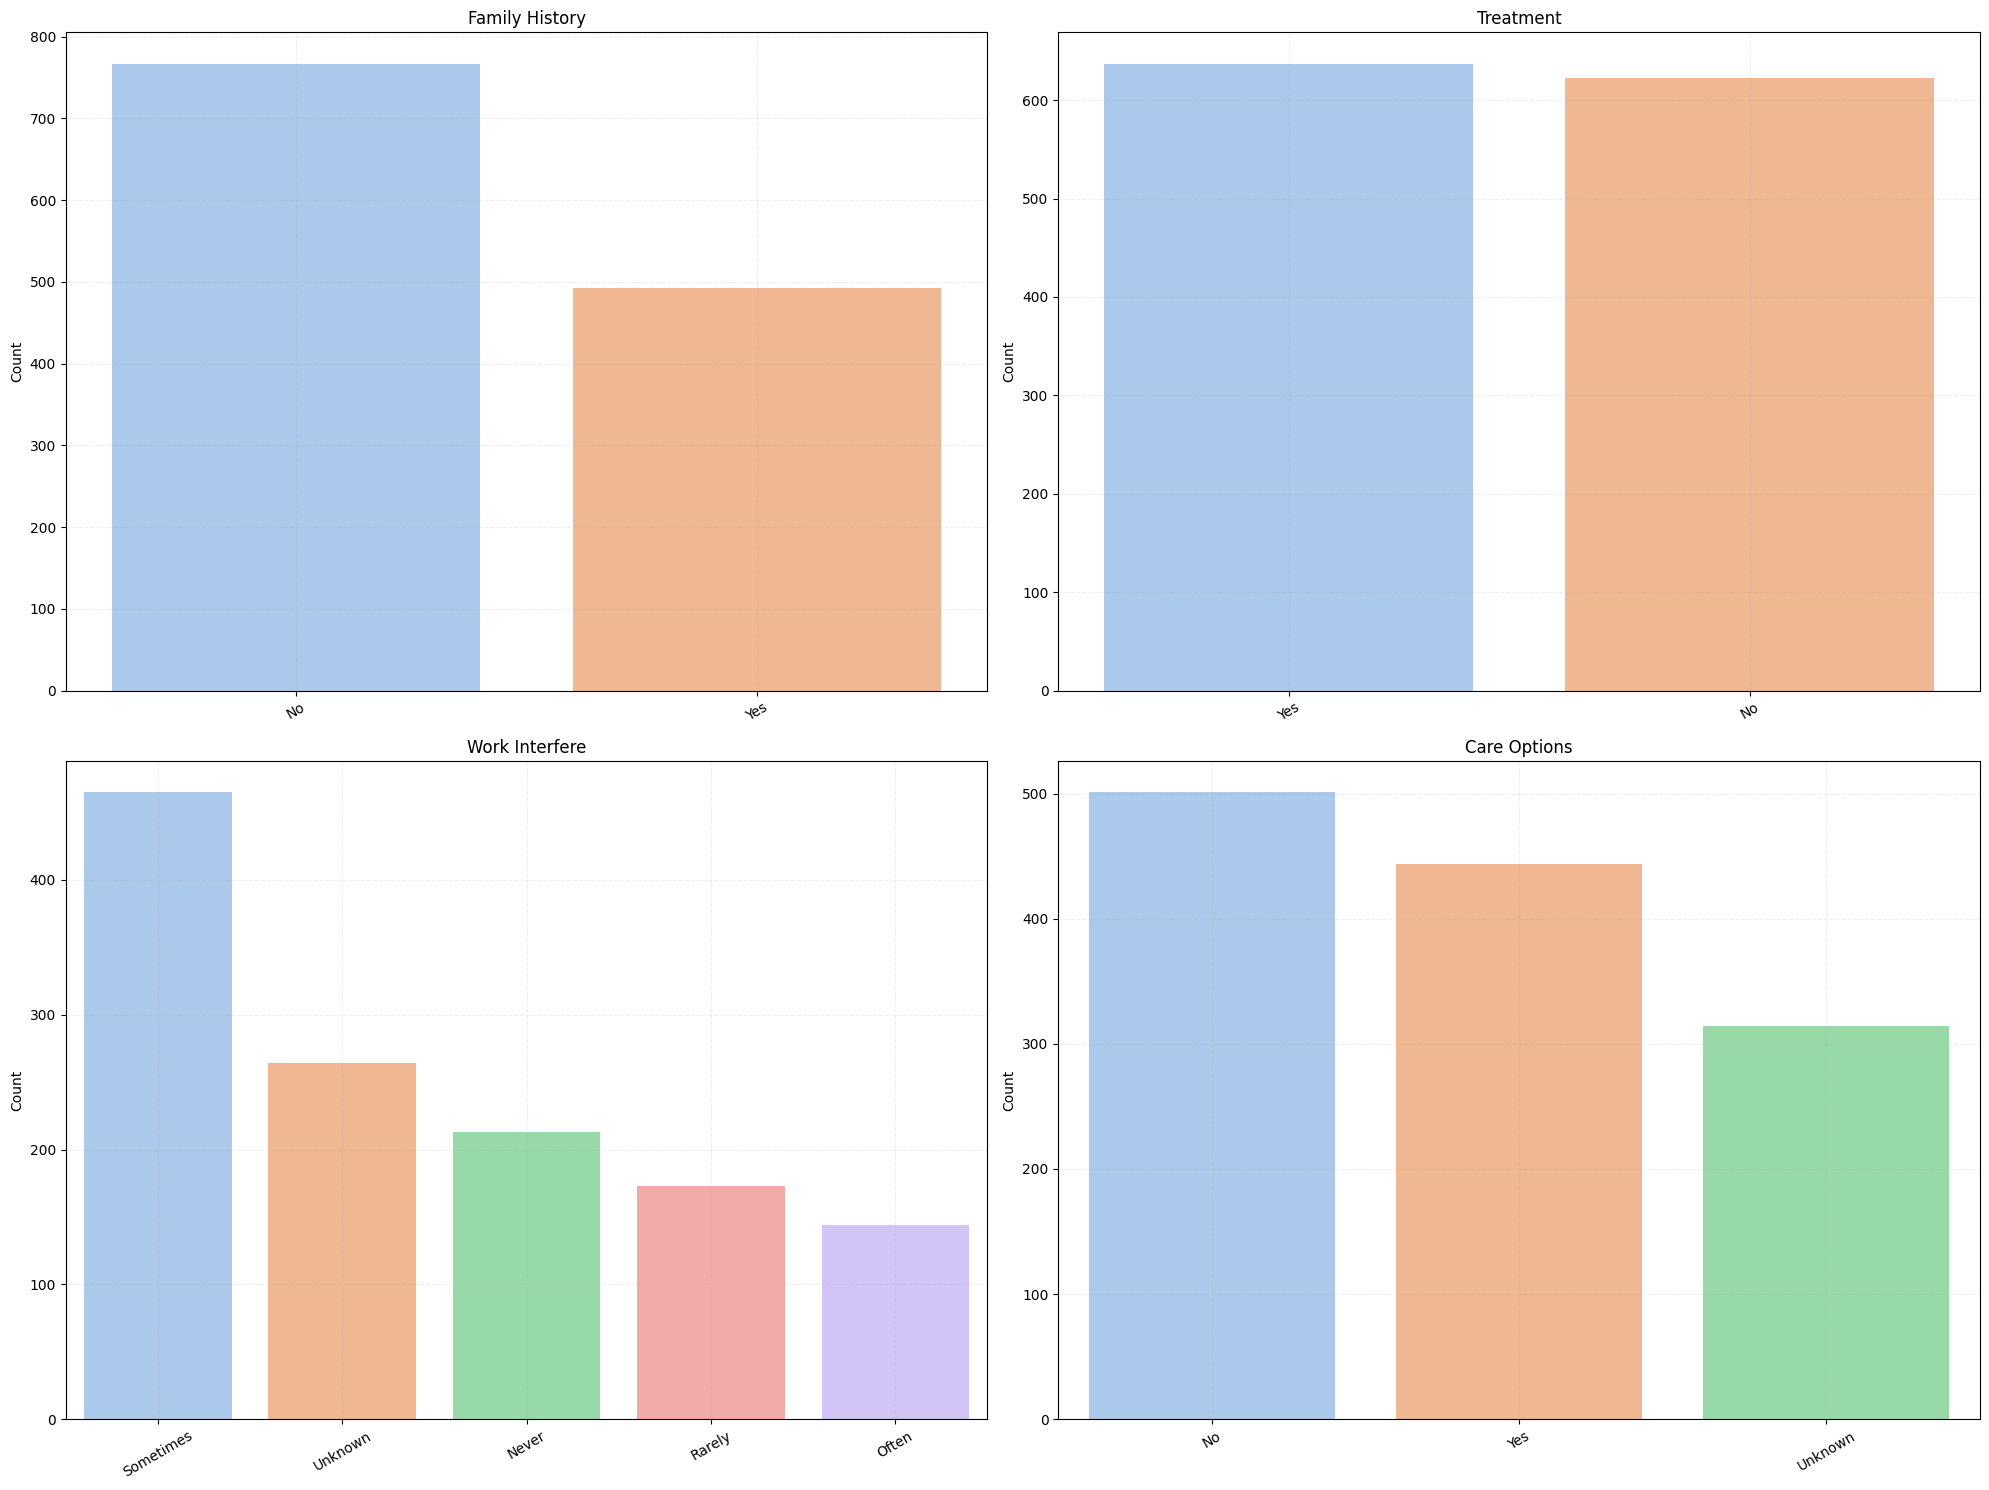

In [ ]:
categorical_cols = ['family_history', 'treatment', 'work_interfere', 'care_options']
titles = ['Family History', 'Treatment', 'Work Interfere', 'Care Options']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df_cleaned, x=col, palette='pastel', order=df_cleaned[col].value_counts().index)
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()


**Age Group Pie:**

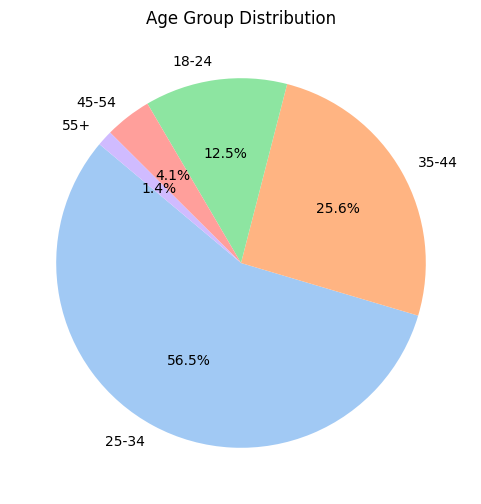

In [ ]:
age_counts = df_cleaned['age_group'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Age Group Distribution')
plt.show()

**Continent Donut:**

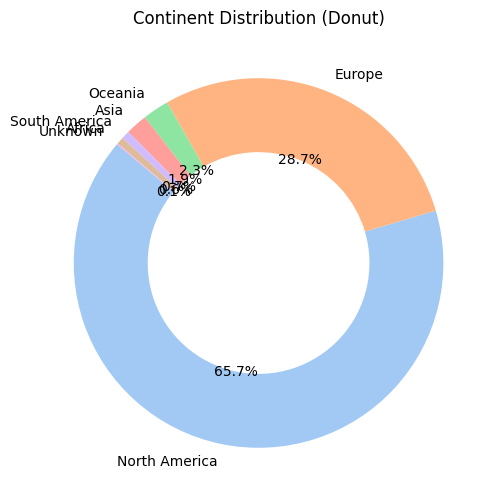

In [ ]:
continent_counts = df_cleaned['continent'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%',
                                   startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
plt.title('Continent Distribution (Donut)')
plt.show()

**Countplot for Age Group and Continent**

/tmp/ipython-input-1669996294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='age_group', order=df_cleaned['age_group'].value_counts().index, palette='mako')
/tmp/ipython-input-1669996294.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='continent', order=df_cleaned['continent'].value_counts().index, palette='rocket')


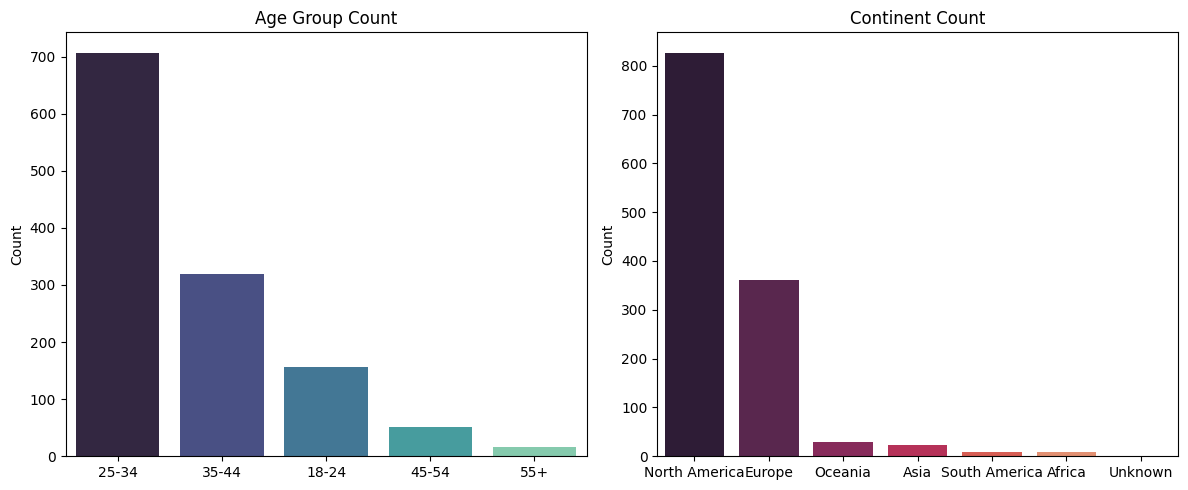

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_cleaned, x='age_group', order=df_cleaned['age_group'].value_counts().index, palette='mako')
plt.title('Age Group Count')
plt.xlabel('')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, x='continent', order=df_cleaned['continent'].value_counts().index, palette='rocket')
plt.title('Continent Count')
plt.xlabel('')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**3.2 Bivariate Analysis (Comparing Two Variables)**

**Question: Does remote work correlate with seeking treatment?**

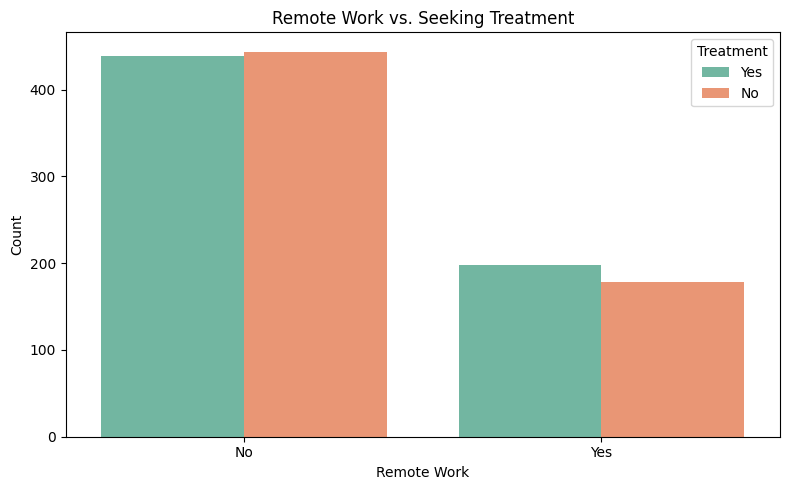

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='remote_work', hue='treatment', palette='Set2')
plt.title("Remote Work vs. Seeking Treatment")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



*   Among those not working remotely, the counts of people seeking and not seeking treatment are nearly the same.
*   Among those working remotely, the number of people seeking treatment is slightly higher than those who don't.



**Question: Are men less likely to seek help than other genders?**

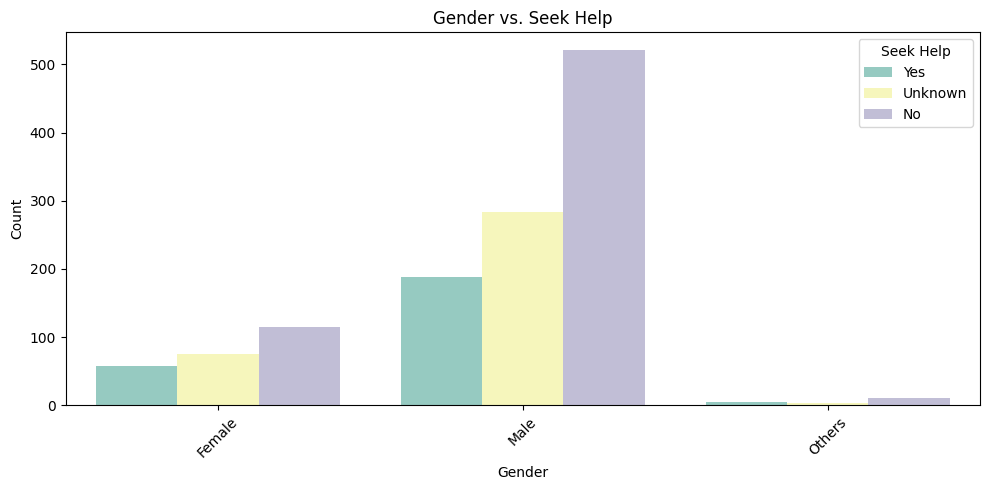

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='gender', hue='seek_help', palette='Set3')
plt.title("Gender vs. Seek Help")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Seek Help")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Yes, men appear less likely to seek help compared to other genders in this dataset. This trend reflects broader patterns in mental health where men may be less inclined to seek professional help, possibly due to stigma or workplace culture.

**Question: Does company size affect support options or consequences?**

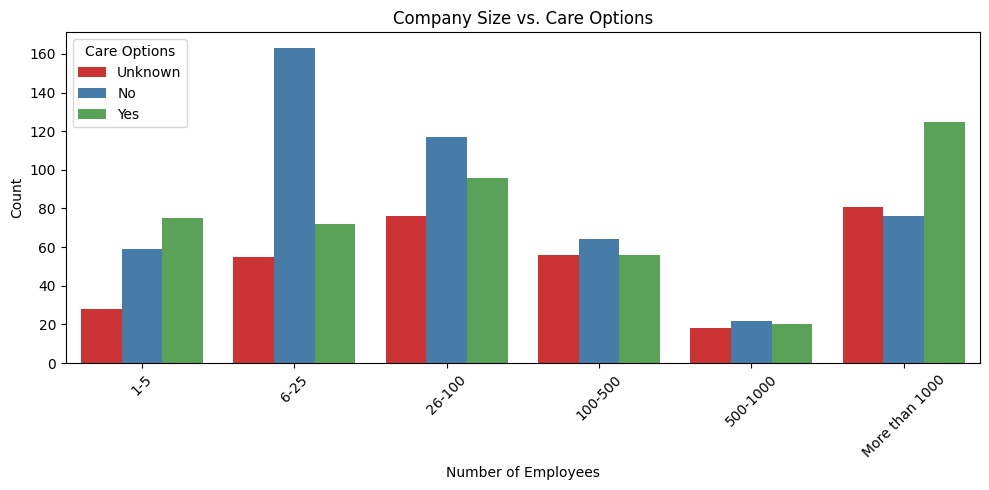

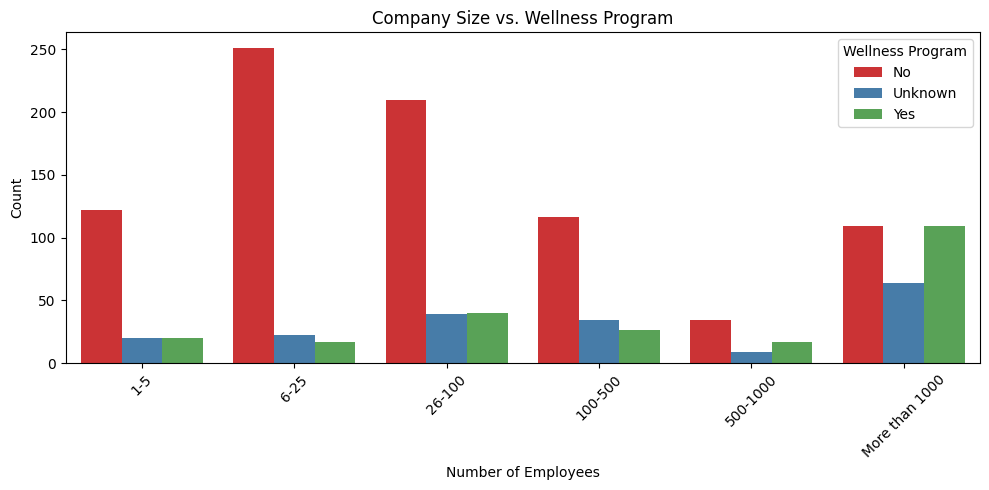

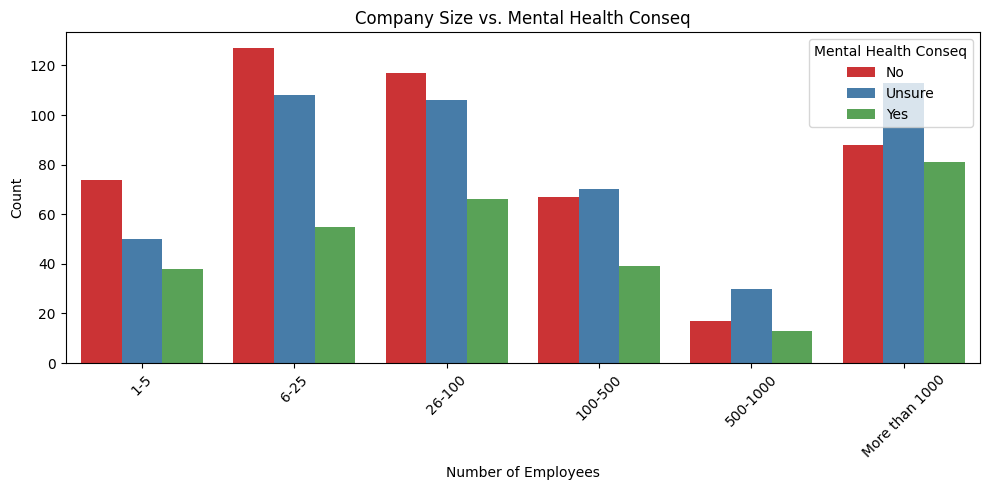

In [ ]:
cols_to_plot = ['care_options', 'wellness_program', 'mental_health_conseq']
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
df_cleaned['num_employees'] = pd.Categorical(df_cleaned['num_employees'],
                                              categories=employee_order,
                                              ordered=True)

for col in cols_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x='num_employees', hue=col, palette='Set1')
    plt.title(f"Company Size vs. {col.replace('_', ' ').title()}")
    plt.xlabel("Number of Employees")
    plt.ylabel("Count")
    plt.legend(title=col.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




*   Larger organizations are more likely to offer structured mental health care options, while small and mid-sized ones lag behind or have inconsistent availability or awareness.
*   Wellness programs are still underrepresented across company sizes. Even in large companies, either they don’t exist or employees are unaware of them.
*   Perceived consequences of discussing mental health persist across all sizes, but especially in smaller and mid-sized companies. Larger companies show more uncertainty, possibly due to complex HR systems or communication gaps.






**Question:Do people in tech companies recieve more support?**

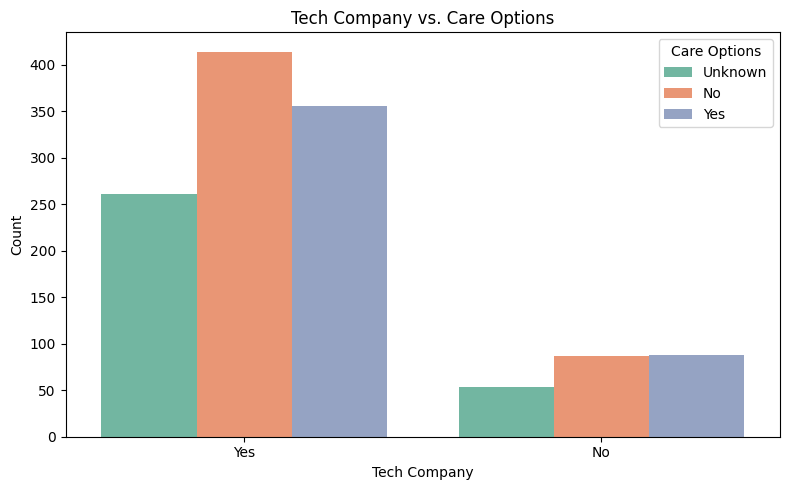

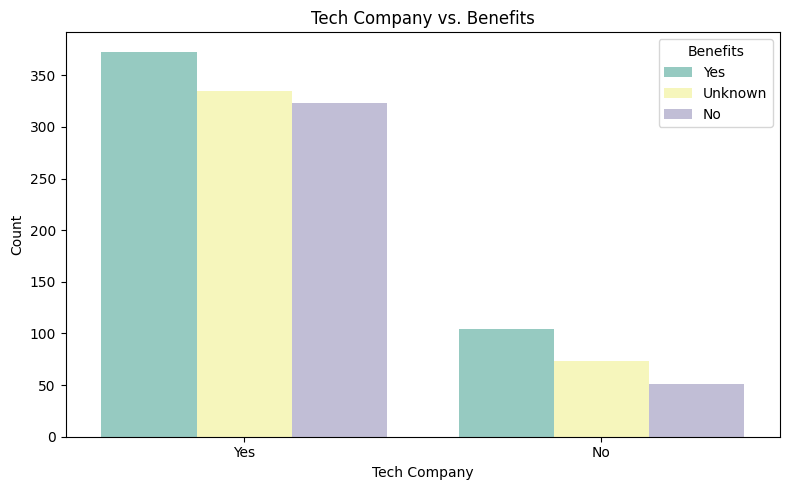

In [ ]:
# plot for is_tech_company vs care_options
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='is_tech_company', hue='care_options', palette='Set2')
plt.title("Tech Company vs. Care Options")
plt.xlabel("Tech Company")
plt.ylabel("Count")
plt.legend(title="Care Options")
plt.tight_layout()
plt.show()

# plot for is_tech_company vs benefits
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='is_tech_company', hue='benefits', palette='Set3')
plt.title("Tech Company vs. Benefits")
plt.xlabel("Tech Company")
plt.ylabel("Count")
plt.legend(title="Benefits")
plt.tight_layout()
plt.show()


*   Employees in tech companies are significantly more likely to report having care options available, but a large portion still mark it as “No” or “Unknown,” showing potential awareness or accessibility gaps.
*   Tech companies generally offer more mental health benefits than non-tech ones, but even within tech, a notable portion of respondents report no or unknown benefits.



**Question:Does family history affect outcomes?**

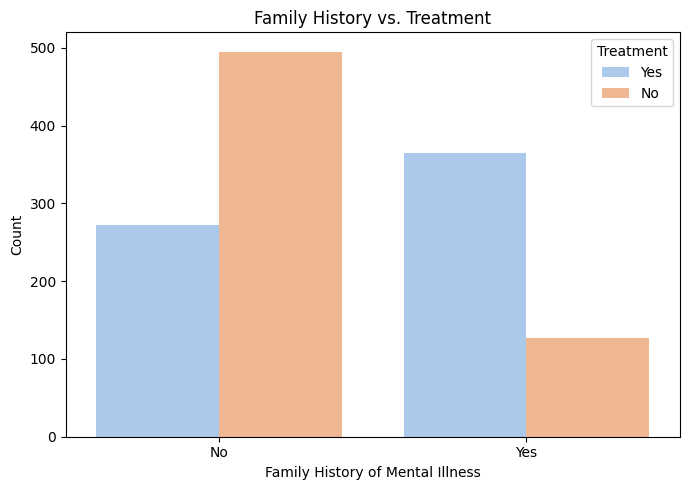

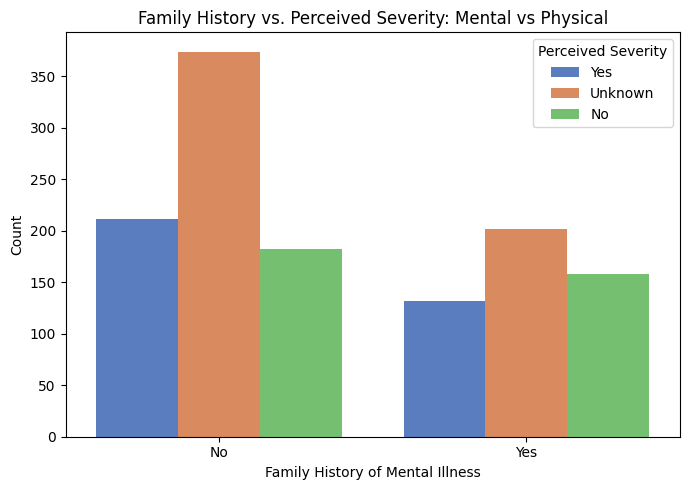

In [ ]:
# family_history vs treatment
plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='family_history', hue='treatment', palette='pastel')
plt.title("Family History vs. Treatment")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.tight_layout()
plt.show()

# family_history vs mental_vs_physical
plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='family_history', hue='mental_vs_physical', palette='muted')
plt.title("Family History vs. Perceived Severity: Mental vs Physical")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title="Perceived Severity")
plt.tight_layout()
plt.show()




*   Those with a family history of mental illness are more likely to have sought treatment, suggesting personal exposure may encourage proactive care.
*   Respondents with family history are more likely to recognize mental health as equally severe as physical health, indicating increased mental health awareness.



**Question: How does age affect outcomes?**

/tmp/ipython-input-353717550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='treatment', y='age', palette='coolwarm')


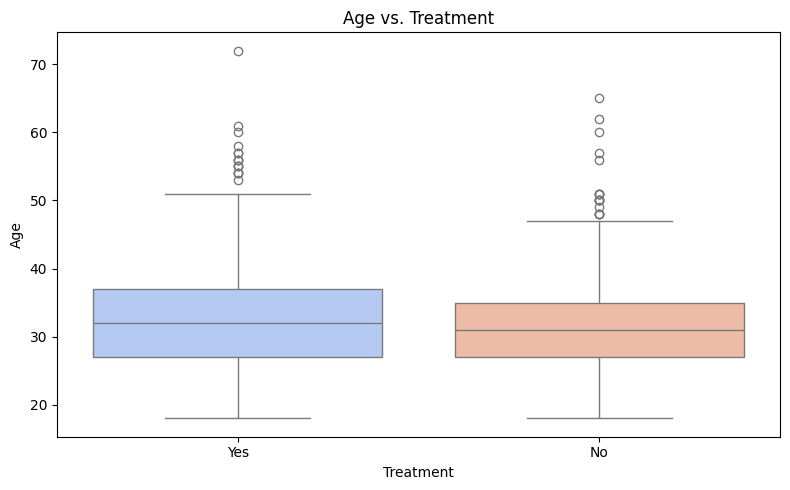

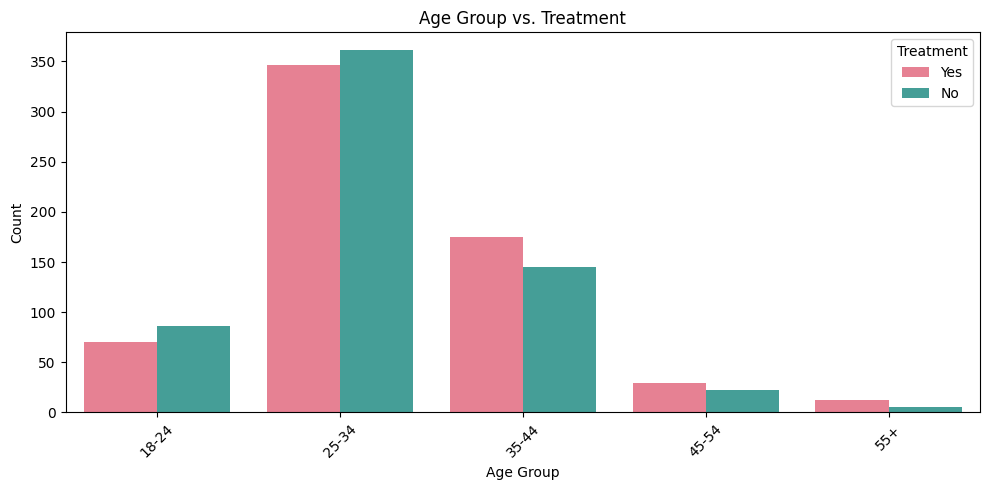

In [ ]:
# boxplot: age vs. treatment
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='treatment', y='age', palette='coolwarm')
plt.title("Age vs. Treatment")
plt.xlabel("Treatment")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# since 'age_group' column exists
if 'age_group' in df_cleaned.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x='age_group', hue='treatment', palette='husl')
    plt.title("Age Group vs. Treatment")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.legend(title="Treatment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




*   Age distribution is similar across those who seek treatment and those who don’t, with slightly higher median age for treated individuals.
*  Most treatment-seeking behavior is concentrated in the 25–34 age group, but a large proportion of this group still avoids treatment, pointing to stigma or barriers even in younger adults.

**3.3 Correlation and Association Analysis:**

**3.3.1 Correlation Heatmap**

In [ ]:
df_encoded = df_cleaned.copy()

In [ ]:
df_encoded.dtypes[df_encoded.dtypes == 'object']

,0
gender,object
country,object
state,object
is_self_employed,object
family_history,object
treatment,object
work_interfere,object
remote_work,object
is_tech_company,object
benefits,object


In [ ]:
# label encoding for binary and ordinal categorical cols
le = LabelEncoder()

cols_to_label_encode = [
    'treatment', 'mental_vs_physical', 'family_history', 'benefits', 'care_options',
    'seek_help', 'wellness_program', 'anonymity', 'observed_consequence', 'is_tech_company'
]

for col in cols_to_label_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [ ]:
df_encoded[cols_to_label_encode].head()

,treatment,mental_vs_physical,family_history,benefits,care_options,seek_help,wellness_program,anonymity,observed_consequence,is_tech_company
0,1,2,0,2,1,2,0,2,0,1
1,0,1,0,1,0,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,1
3,1,0,1,0,2,0,0,0,1,1
4,0,1,0,2,0,1,1,1,0,1


In [ ]:
# custom mapping for num_employees
num_emp_map = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
}
df_encoded['num_employees'] = df_encoded['num_employees'].map(num_emp_map)

In [ ]:
df_encoded['num_employees'] = df_encoded['num_employees'].astype(int)

In [ ]:
# one hot encode categories like age group and leave
df_encoded = pd.get_dummies(df_encoded, columns=['age_group', 'leave'], drop_first=True)

In [ ]:
print(df_encoded.columns[df_encoded.columns.str.contains('age_group|leave')])


Index(['age_group_25-34', 'age_group_35-44', 'age_group_45-54',
       'age_group_55+', 'leave_1', 'leave_2', 'leave_3', 'leave_4'],
      dtype='object')


In [ ]:
# generate correlation matrix
df_corr = df_encoded.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = df_corr.corr()

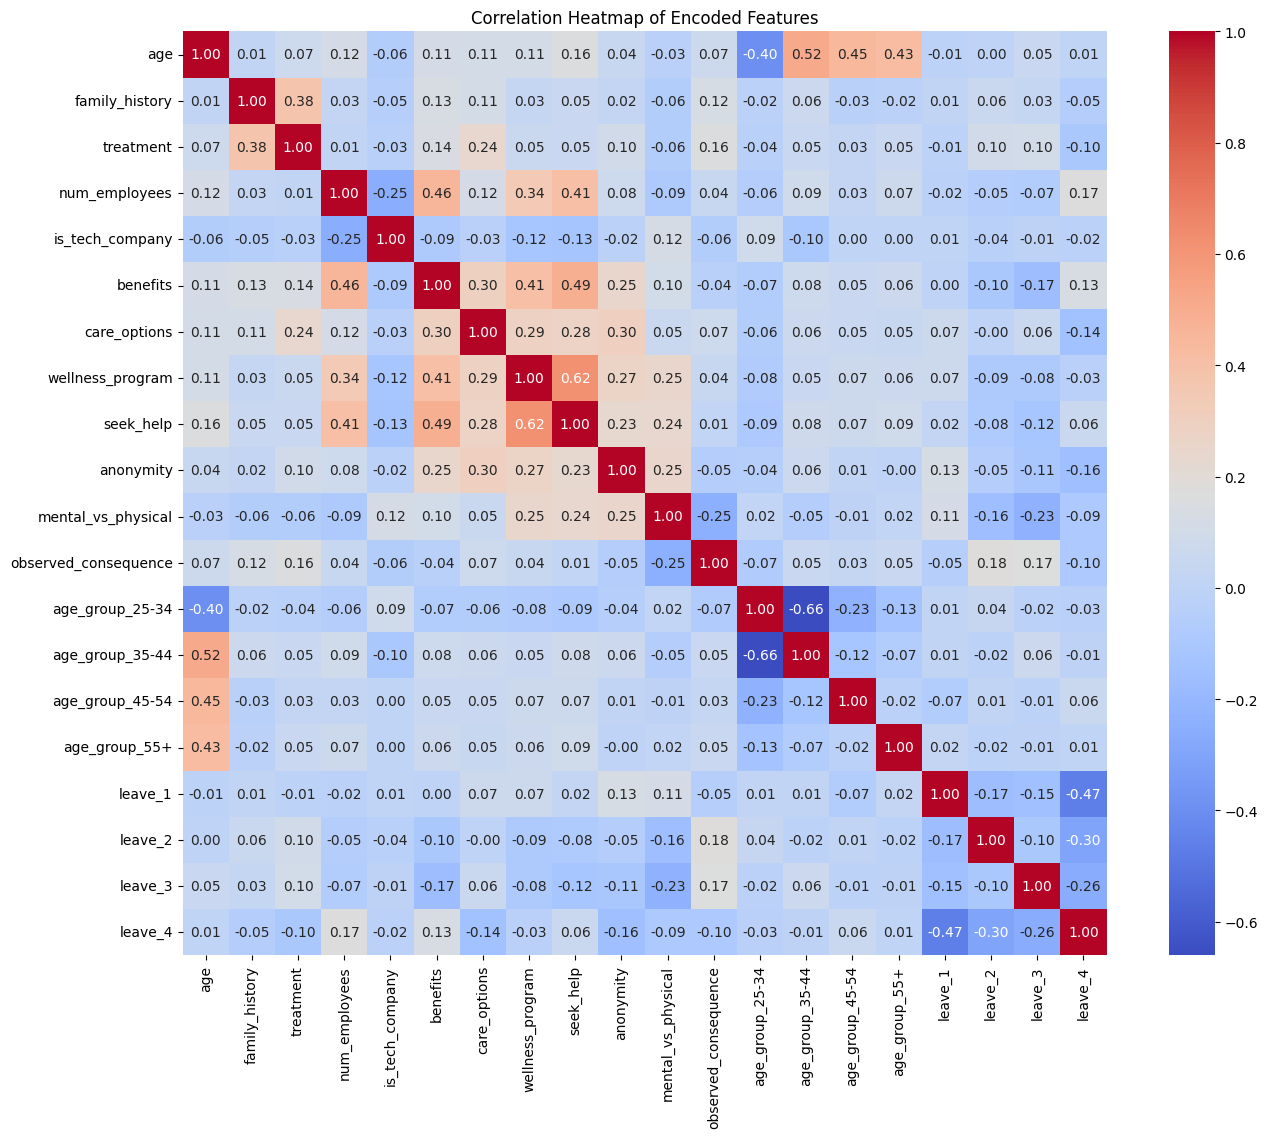

In [ ]:
# plot the heat map
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Encoded Features")
plt.show()

The correlation heatmap reveals several meaningful relationships. As expected, age is strongly correlated (both positively and negatively) with its corresponding age group indicators, due to the mutually exclusive nature of one-hot encoding. Notably, larger organizations are more likely to offer mental health benefits (r = 0.46), which often coexist with wellness programs (r = 0.41) and are linked to a greater likelihood of employees seeking help (r = 0.49). The strongest correlation observed was between access to wellness programs and help-seeking behavior (r = 0.62), highlighting the potential impact of organizational initiatives on mental health support. Additionally, the leave policy categories display a moderate negative correlation (r = -0.47), suggesting contrast between perceived ease and difficulty in taking mental health leave.

**Chi-Sqaure Test of Independence**

Pairs to analyse:

tech_company × care_options

In [ ]:
contingency_table = pd.crosstab(df_cleaned['is_tech_company'], df_cleaned['care_options'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Statistically significant association.")
else:
    print("No significant association.")


Chi-square = 1.383, p-value = 0.5007, dof = 2
No significant association.


family_history × treatment

In [ ]:
contingency_table = pd.crosstab(df_cleaned['family_history'], df_cleaned['treatment'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Statistically significant association.")
else:
    print("No significant association.")


Chi-square = 178.267, p-value = 0.0000, dof = 1
Statistically significant association.


benefits x mental_vs_physical

In [ ]:
contingency_table = pd.crosstab(df_cleaned['benefits'], df_cleaned['mental_vs_physical'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Statistically significant association.")
else:
    print("No significant association.")


Chi-square = 54.016, p-value = 0.0000, dof = 4
Statistically significant association.


age_group × treatment

In [ ]:
contingency_table = pd.crosstab(df_cleaned['age_group'], df_cleaned['treatment'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Statistically significant association.")
else:
    print("No significant association.")


Chi-square = 8.481, p-value = 0.0755, dof = 4
No significant association.


As expected, family history showed a strong and statistically significant relationship with treatment-seeking behavior, confirming previous correlation findings.

Employee benefits were also significantly associated with how individuals perceive mental vs. physical health, supporting our earlier observations.

However, age group did not show a statistically significant association with treatment, indicating that treatment decisions may be more nuanced than just age categories

**Cramer's Heat Map**

In [ ]:
# creamer's v function
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [ ]:
cat_cols = ['family_history', 'treatment', 'benefits', 'care_options','wellness_program', 'seek_help', 'mental_vs_physical']

cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            table = pd.crosstab(df_cleaned[col1], df_cleaned[col2])
            cramer_matrix.loc[col1, col2] = cramers_v(table)

cramer_matrix = cramer_matrix.astype(float)

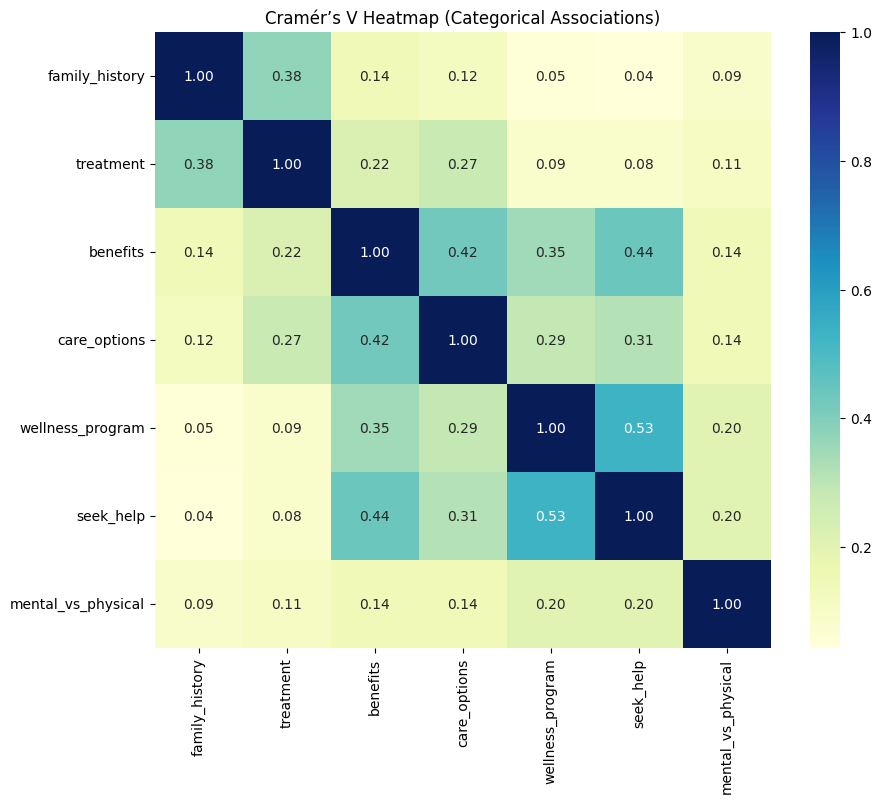

In [ ]:
# heatmap for cramer

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title("Cramér’s V Heatmap (Categorical Associations)")
plt.show()

wellness_program × seek_help (0.53) → Strong association; access to wellness programs encourages help-seeking.

benefits × seek_help (0.44) → Moderate; employees with better benefits more likely to seek help.

benefits × care_options (0.42) → Moderate; benefits often tied to available care options.

family_history × treatment (0.38) → Borderline-moderate and statistically significant; family history may drive treatment.

benefits × wellness_program (0.35) → Weak–moderate but logical; good benefits may include wellness initiatives.

care_options × seek_help (0.31) → Weak–moderate; knowing about care options may facilitate seeking help.

care_options × wellness_program (0.29) → Weak but possibly useful; both relate to support infrastructure.

**Additional Questions to Evaluate**

Check if employees who answered “Maybe” to seeking help are also lacking benefits or care options, which could suggest that uncertain workplace support = personal hesitancy

In [ ]:
# filter the groups
yes_df = df_cleaned[df_cleaned['seek_help'] == 'Yes']
no_df = df_cleaned[df_cleaned['seek_help'] == 'No']
maybe_df = df_cleaned[df_cleaned['seek_help'] == 'Unknown']

In [ ]:
# check distribution for each group
print("=== Benefits ===")
print("Yes group:")
print(yes_df['benefits'].value_counts(normalize=True).round(2))

print("\nNo group:")
print(no_df['benefits'].value_counts(normalize=True).round(2))

print("\nMaybe/Unknown group:")
print(maybe_df['benefits'].value_counts(normalize=True).round(2))


print("\n=== Care Options ===")
print("Yes group:")
print(yes_df['care_options'].value_counts(normalize=True).round(2))

print("\nNo group:")
print(no_df['care_options'].value_counts(normalize=True).round(2))

print("\nMaybe/Unknown group:")
print(maybe_df['care_options'].value_counts(normalize=True).round(2))


=== Benefits ===
Yes group:
benefits
Yes        0.82
No         0.10
Unknown    0.08
Name: proportion, dtype: float64

No group:
benefits
No         0.51
Unknown    0.27
Yes        0.22
Name: proportion, dtype: float64

Maybe/Unknown group:
benefits
Unknown    0.59
Yes        0.35
No         0.06
Name: proportion, dtype: float64

=== Care Options ===
Yes group:
care_options
Yes        0.67
Unknown    0.19
No         0.14
Name: proportion, dtype: float64

No group:
care_options
No         0.51
Yes        0.33
Unknown    0.16
Name: proportion, dtype: float64

Maybe/Unknown group:
care_options
Unknown    0.45
No         0.37
Yes        0.18
Name: proportion, dtype: float64


Benefit Access:

*  People who do seek help are very likely (82%) to report having benefits.
*  People who don’t are very likely (51%) to say no benefits.
*  People who are unsure mostly say they don’t know (59%).

Care Options Access:
*  Again, those who say yes to seeking help tend to have care options.
*  Those who say no lack care.
*  Maybe/Unknown folks mostly say “I don’t know” (45%).


Among respondents who were unsure about seeking mental health support, the majority reported not knowing whether they had access to mental health benefits (59%) or care options (45%). Compared to those who confidently said “Yes,” this group had significantly lower awareness or access to resources. This pattern suggests that uncertainty or lack of workplace support may contribute to personal hesitation in seeking help. Improving clarity and communication around available support could help reduce this hesitancy.


---



Question: Are people uncertain about the consequences of mental health issues less likely to seek treatment?

In [ ]:
# filter data
unknown_consequence_df = df_cleaned[df_cleaned['mental_health_conseq'] == 'Unsure']
# check how it respinds to treatment
print("Treatment distribution for 'Unknown' in mental_health_conseq:")
print(unknown_consequence_df['treatment'].value_counts(normalize=True).round(2))
# compare with other groups
yes_consequence_df = df_cleaned[df_cleaned['mental_health_conseq'] == 'Yes']
no_consequence_df = df_cleaned[df_cleaned['mental_health_conseq'] == 'No']
print("\nTreatment distribution for 'Yes' in mental_health_conseq:")
print(yes_consequence_df['treatment'].value_counts(normalize=True).round(2))

print("\nTreatment distribution for 'No' in mental_health_conseq:")
print(no_consequence_df['treatment'].value_counts(normalize=True).round(2))

Treatment distribution for 'Unknown' in mental_health_conseq:
treatment
Yes    0.53
No     0.47
Name: proportion, dtype: float64

Treatment distribution for 'Yes' in mental_health_conseq:
treatment
Yes    0.6
No     0.4
Name: proportion, dtype: float64

Treatment distribution for 'No' in mental_health_conseq:
treatment
No     0.57
Yes    0.43
Name: proportion, dtype: float64


Respondents who were unsure about the consequences of mental health issues were somewhat less likely to seek treatment (53%) than those who believed there would be consequences (60%). However, they were still more proactive than those who believed there would be no consequences (43%). This suggests that awareness and perceived consequences may play a role in motivating help-seeking behavior.


---



Regional Trends

In [ ]:
# analyse treatment rate by continent
treatment_by_continent = df_cleaned.groupby('continent')['treatment'].value_counts(normalize=True).unstack()
print(treatment_by_continent.round(2))

treatment        No   Yes
continent                
Africa         0.38  0.62
Asia           0.79  0.21
Europe         0.56  0.44
North America  0.46  0.54
Oceania        0.38  0.62
South America  0.78  0.22
Unknown         NaN  1.00


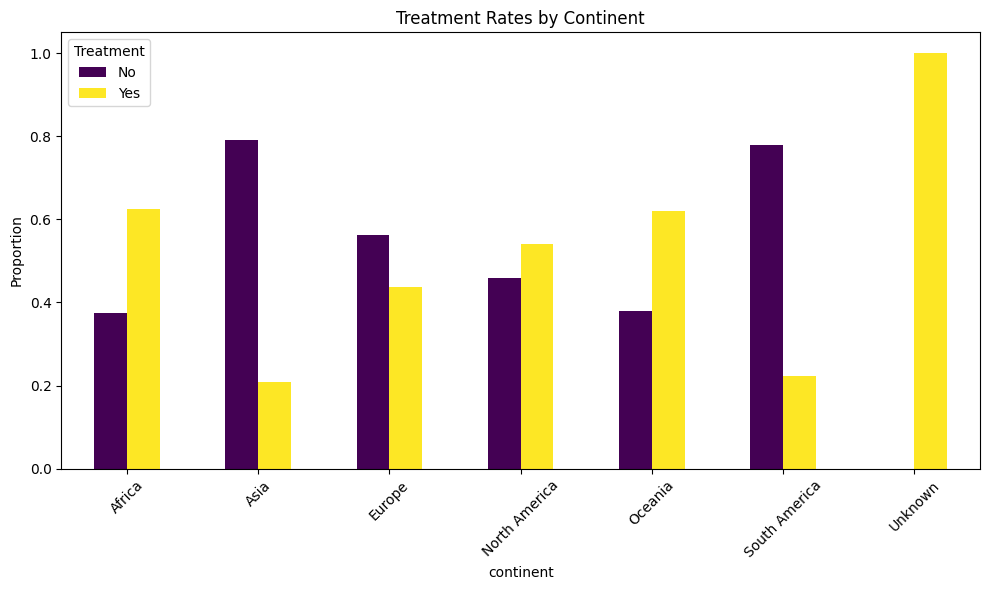

In [ ]:
treatment_by_continent.plot(kind='bar', stacked=False, figsize=(10,6), colormap='viridis')
plt.title("Treatment Rates by Continent")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Treatment")
plt.tight_layout()
plt.show()

In [ ]:
# care_options by continnet
care_by_continent = df_cleaned.groupby('continent')['care_options'].value_counts(normalize=True).unstack()
print(care_by_continent.round(2))
print("\n")
#seek_help by continnet
seek_by_continent = df_cleaned.groupby('continent')['seek_help'].value_counts(normalize=True).unstack()
print(seek_by_continent.round(2))

care_options     No  Unknown   Yes
continent                         
Africa         0.62      NaN  0.38
Asia           0.62     0.25  0.12
Europe         0.56     0.22  0.22
North America  0.32     0.27  0.41
Oceania        0.31     0.21  0.48
South America  0.67      NaN  0.33
Unknown         NaN      NaN  1.00


seek_help        No  Unknown   Yes
continent                         
Africa         1.00      NaN   NaN
Asia           0.79     0.17  0.04
Europe         0.69     0.20  0.11
North America  0.42     0.34  0.24
Oceania        0.55     0.10  0.34
South America  1.00      NaN   NaN
Unknown         NaN      NaN  1.00


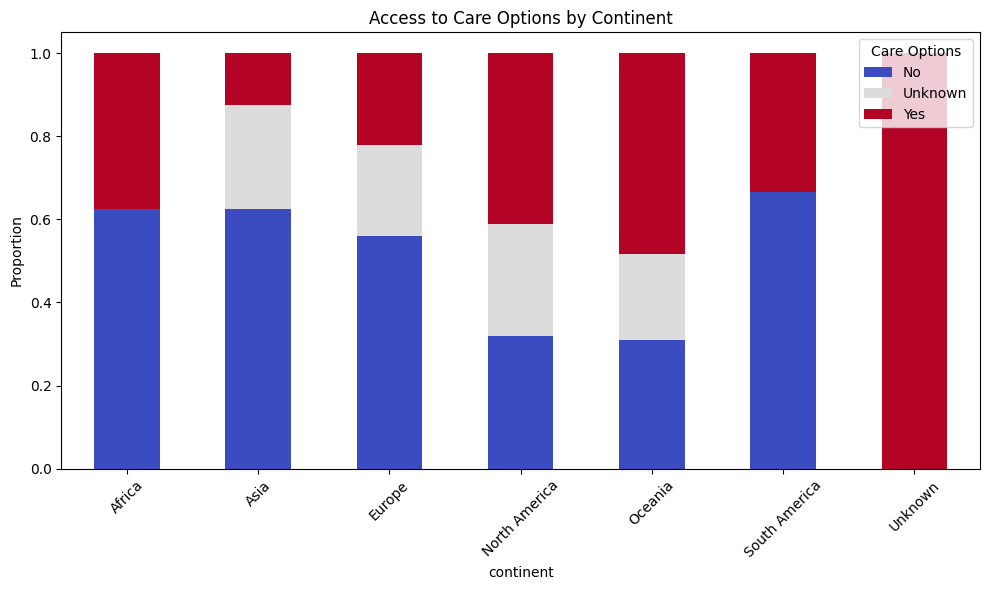

In [ ]:
care_by_continent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Access to Care Options by Continent")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Care Options")
plt.tight_layout()
plt.show()

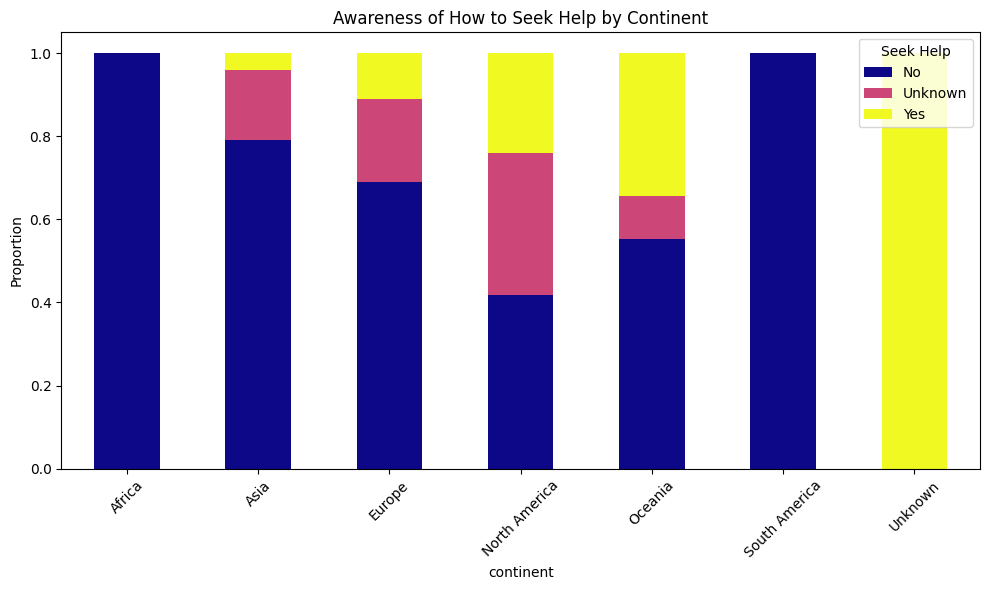

In [ ]:
seek_by_continent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='plasma')
plt.title("Awareness of How to Seek Help by Continent")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Seek Help")
plt.tight_layout()
plt.show()

*  Respondents from Africa and Oceania show higher treatment rates, suggesting more action despite possibly limited resources.
*  Respondents from South America, Europe, and Asia report the lowest access to care options, pointing to critical infrastructure gaps.
*  North America, Africa and Oceania show relatively better care access, though still with a majority reporting limited options.
*  Africa and South America show 100% of respondents unaware of how to seek help, the most alarming insight.
* Asia follows with low awareness.
* North America and Oceania lead in help-seeking awareness, though over half still report not knowing how.
* Europe shows moderate awareness, highlighting potential impact of education and outreach.


---



Edge Case by Age Group

In [ ]:
# filter two age groups
younger = df_cleaned[df_cleaned['age_group'] == '18-24']
older = df_cleaned[df_cleaned['age_group'].isin(['45-54', '55+'])]

In [ ]:
# check distribution in each group

# seek help
print("Younger seek_help:")
print(younger['seek_help'].value_counts(normalize=True).round(2))

print("\nOlder seek_help:")
print(older['seek_help'].value_counts(normalize=True).round(2))

# mental vs physical
print("\nYounger mental_vs_physical:")
print(younger['mental_vs_physical'].value_counts(normalize=True).round(2))

print("\nOlder mental_vs_physical:")
print(older['mental_vs_physical'].value_counts(normalize=True).round(2))

# mental health conseq
print("\nYounger mental_health_conseq:")
print(younger['mental_health_conseq'].value_counts(normalize=True).round(2))

print("\nOlder mental_health_conseq:")
print(older['mental_health_conseq'].value_counts(normalize=True).round(2))

# benefits
print("\nYounger benefits:")
print(younger['benefits'].value_counts(normalize=True).round(2))

print("\nOlder benefits:")
print(older['benefits'].value_counts(normalize=True).round(2))


Younger seek_help:
seek_help
No         0.53
Unknown    0.35
Yes        0.12
Name: proportion, dtype: float64

Older seek_help:
seek_help
Yes        0.38
No         0.34
Unknown    0.28
Name: proportion, dtype: float64

Younger mental_vs_physical:
mental_vs_physical
Unknown    0.46
Yes        0.30
No         0.24
Name: proportion, dtype: float64

Older mental_vs_physical:
mental_vs_physical
Unknown    0.43
Yes        0.29
No         0.28
Name: proportion, dtype: float64

Younger mental_health_conseq:
mental_health_conseq
No        0.44
Unsure    0.36
Yes       0.21
Name: proportion, dtype: float64

Older mental_health_conseq:
mental_health_conseq
No        0.38
Unsure    0.32
Yes       0.29
Name: proportion, dtype: float64

Younger benefits:
benefits
Unknown    0.47
No         0.28
Yes        0.25
Name: proportion, dtype: float64

Older benefits:
benefits
Yes        0.53
Unknown    0.28
No         0.19
Name: proportion, dtype: float64


Seek Help:
*  Younger respondents are more likely to say “No” or “Unknown” when asked about seeking help, with only 12% saying “Yes.”
* Older respondents are more proactive in seeking help (38% “Yes”), showing greater openness.

Mental vs Physical Health Importance:
*  Younger respondents were slightly more likely to say “Yes” to valuing mental health equally as physical (30% vs. 29%), but “Unknown” responses dominate for both.
*  Older respondents show a slightly higher rate of denying equality between mental and physical health (28% “No” vs. 24% in younger).

Mental Health Conseq:
*  Older adults report a higher perceived consequence of mental health issues at work (29% “Yes”) vs. 21% among younger.
*  Younger respondents tend to lean more towards “No” or “Unsure,” indicating uncertainty or perceived resilience.

Benefits Availability:
*  Older adults report higher availability of mental health benefits (53% “Yes”), possibly due to more established careers or roles.
*  Younger respondents are more uncertain (47% “Unknown”) about whether benefits exist, pointing to lack of awareness or access.


---



In [ ]:
# export dataset
df_cleaned.to_csv('cleaned_mental_health_data.csv', index = False)

In [ ]:
# download file
from google.colab import files
files.download('cleaned_mental_health_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cleaned['age_group'].unique()

['35-44', '25-34', '18-24', '45-54', NaN, '55+']
Categories (5, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55+']